# Read the data set for missing values

In [6]:
import pandas as pd

file_path = r"E:\STUDY\5TH SEMESTER\DATA SCIENCE\Project\archive\btcusd_1-min_data.csv"
data = pd.read_csv(file_path)

print("First few rows of the dataset:")
print(data.head())

print("\nMissing values in each column:")
print(data.isnull().sum())


First few rows of the dataset:
      Timestamp  Open  High   Low  Close  Volume
0  1.325412e+09  4.58  4.58  4.58   4.58     0.0
1  1.325412e+09  4.58  4.58  4.58   4.58     0.0
2  1.325412e+09  4.58  4.58  4.58   4.58     0.0
3  1.325412e+09  4.58  4.58  4.58   4.58     0.0
4  1.325412e+09  4.58  4.58  4.58   4.58     0.0

Missing values in each column:
Timestamp    1
Open         0
High         0
Low          0
Close        0
Volume       0
dtype: int64


# Replace the missing values

In [4]:
#Estimate the missing timestamp
data['Timestamp'] = data['Timestamp'].interpolate()

In [5]:
print(data.isnull().sum())

Timestamp    0
Open         0
High         0
Low          0
Close        0
Volume       0
dtype: int64


# No missing values ,performing analysis

# Summary Statistics

In [8]:
# Mean
mean_values = data.mean()
print("Mean:\n", mean_values)

# Median
median_values = data.median()
print("\nMedian:\n", median_values)

# Mode
mode_values = data.mode().iloc[0]  
print("\nMode:\n", mode_values)

# Standard Deviation
std_values = data.std()
print("\nStandard Deviation:\n", std_values)

# Min and Max
min_values = data.min()
max_values = data.max()
print("\nMinimum Values:\n", min_values)
print("\nMaximum Values:\n", max_values)


Mean:
 Timestamp    1.527454e+09
Open         1.451138e+04
High         1.451764e+04
Low          1.450493e+04
Close        1.451141e+04
Volume       5.467111e+00
dtype: float64

Median:
 Timestamp    1.527432e+09
Open         6.250480e+03
High         6.253460e+03
Low          6.247570e+03
Close        6.250670e+03
Volume       5.000000e-01
dtype: float64

Mode:
 Timestamp    1.325412e+09
Open         5.000000e+00
High         5.000000e+00
Low          5.000000e+00
Close        5.000000e+00
Volume       0.000000e+00
Name: 0, dtype: float64

Standard Deviation:
 Timestamp    1.166740e+08
Open         1.960705e+04
High         1.961461e+04
Low          1.959937e+04
Close        1.960714e+04
Volume       2.294705e+01
dtype: float64

Minimum Values:
 Timestamp    1.325412e+09
Open         3.800000e+00
High         3.800000e+00
Low          3.800000e+00
Close        3.800000e+00
Volume       0.000000e+00
dtype: float64

Maximum Values:
 Timestamp    1.734998e+09
Open         1.082930e+05
H

# Visualtizations

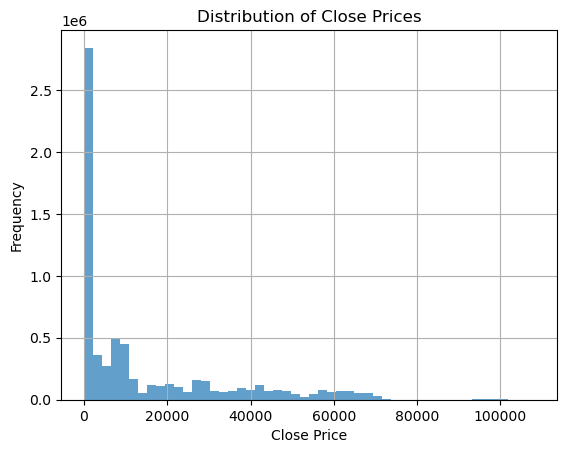

In [9]:
import matplotlib.pyplot as plt

# Histogram for Close prices
data['Close'].hist(bins=50, alpha=0.7)
plt.title('Distribution of Close Prices')
plt.xlabel('Close Price')
plt.ylabel('Frequency')
plt.show()


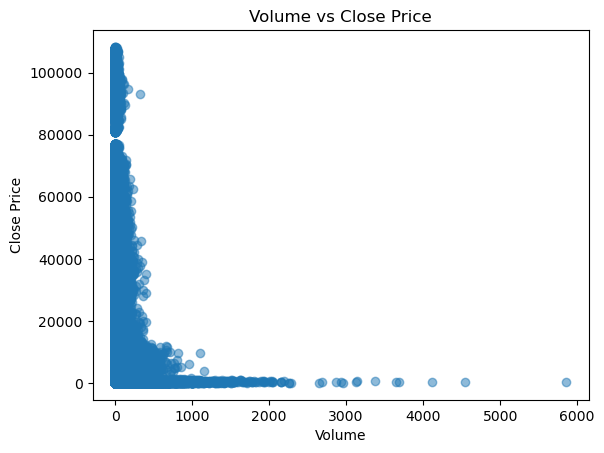

In [10]:
# Scatter plot for Volume vs Close prices
plt.scatter(data['Volume'], data['Close'], alpha=0.5)
plt.title('Volume vs Close Price')
plt.xlabel('Volume')
plt.ylabel('Close Price')
plt.show()


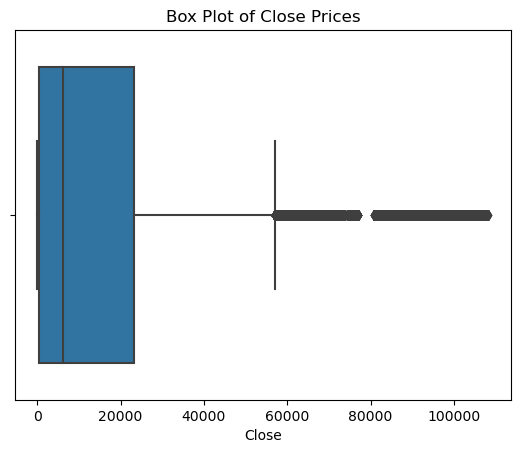

In [14]:
import seaborn as sns

# Box plot for Close prices
sns.boxplot(x=data['Close'])
plt.title('Box Plot of Close Prices')
plt.show()


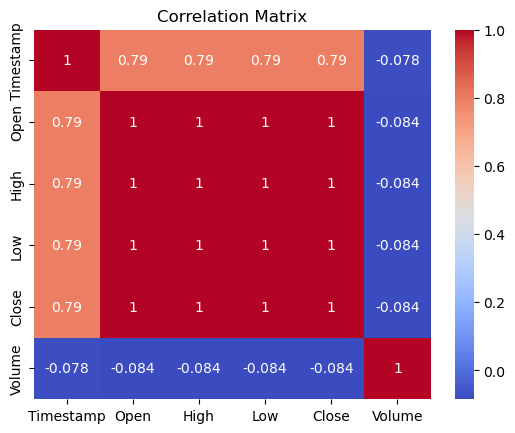

In [15]:
# Correlation matrix
correlation_matrix = data.corr()

# Heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


Missing values:
Timestamp    1
Open         0
High         0
Low          0
Close        0
Volume       0
Date         1
dtype: int64


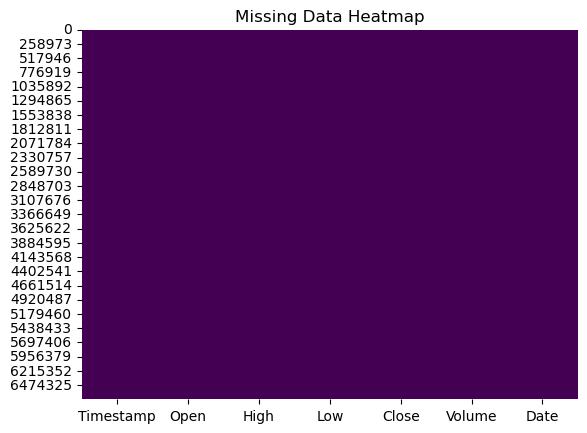

In [29]:
# Missing value analysis
missing_data = data.isnull().sum()
print(f"Missing values:\n{missing_data}")

# Visualizing missing data with a heatmap
sns.heatmap(data.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Data Heatmap')
plt.show()


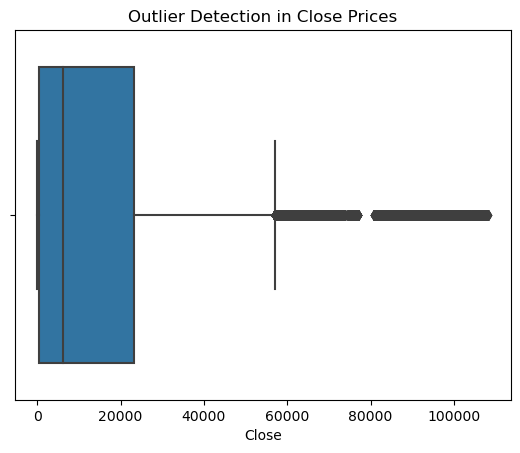

In [22]:
# Box plot for Close prices
sns.boxplot(x=data['Close'])
plt.title('Outlier Detection in Close Prices')
plt.show()


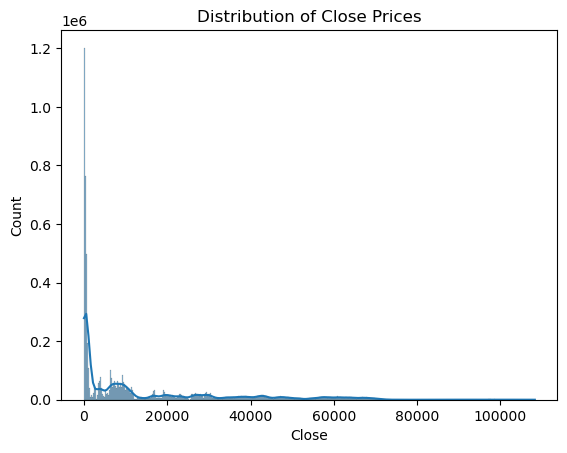

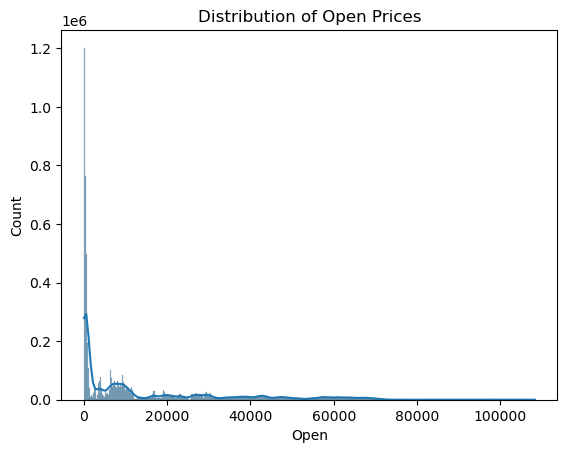

In [50]:
# Distribution of Close Prices (Histogram)
sns.histplot(data['Close'], kde=True)
plt.title('Distribution of Close Prices')
plt.show()

# Distribution of Open Prices (Histogram)
sns.histplot(data['Open'], kde=True)
plt.title('Distribution of Open Prices')
plt.show()



In [23]:
# Data types
print("Data Types:")
print(data.dtypes)

# Unique values
print("\nUnique Values:")
print(data.nunique())


Data Types:
Timestamp    float64
Open         float64
High         float64
Low          float64
Close        float64
Volume       float64
dtype: object

Unique Values:
Timestamp    6733280
Open         1709218
High         1673559
Low          1685002
Close        1700742
Volume       4703215
dtype: int64


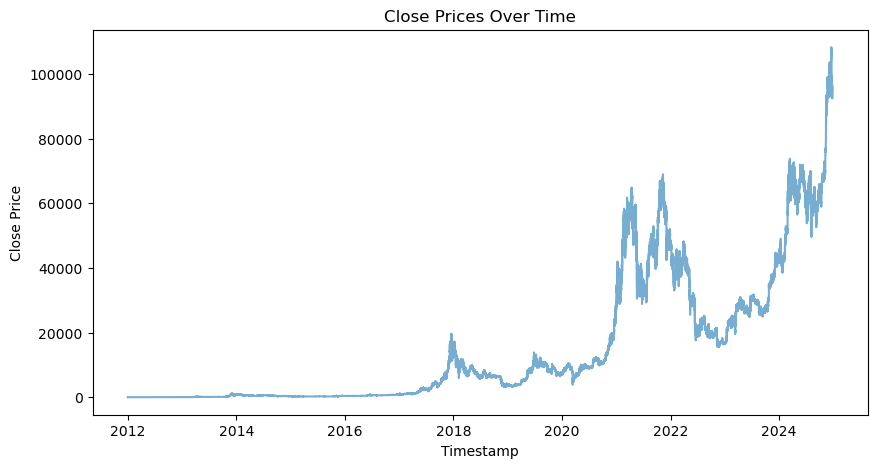

In [28]:
# Convert Timestamp to datetime (if not already done)
data['Timestamp'] = pd.to_datetime(data['Timestamp'], unit='s')

# Plot trends for Close prices
plt.figure(figsize=(10, 5))
plt.plot(data['Timestamp'], data['Close'], alpha=0.6)
plt.title('Close Prices Over Time')
plt.xlabel('Timestamp')
plt.ylabel('Close Price')
plt.show()


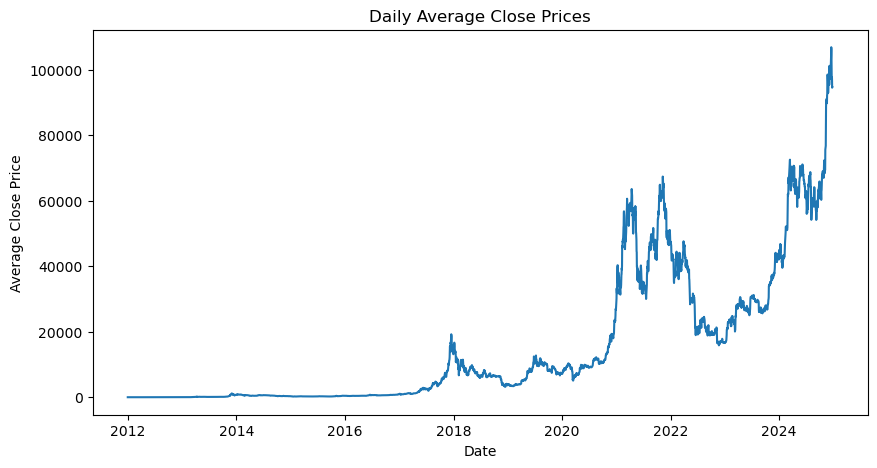

In [25]:
# Group by day and calculate mean
data['Date'] = data['Timestamp'].dt.date
daily_data = data.groupby('Date').mean()

# Plot daily average Close prices
plt.figure(figsize=(10, 5))
plt.plot(daily_data.index, daily_data['Close'])
plt.title('Daily Average Close Prices')
plt.xlabel('Date')
plt.ylabel('Average Close Price')
plt.show()


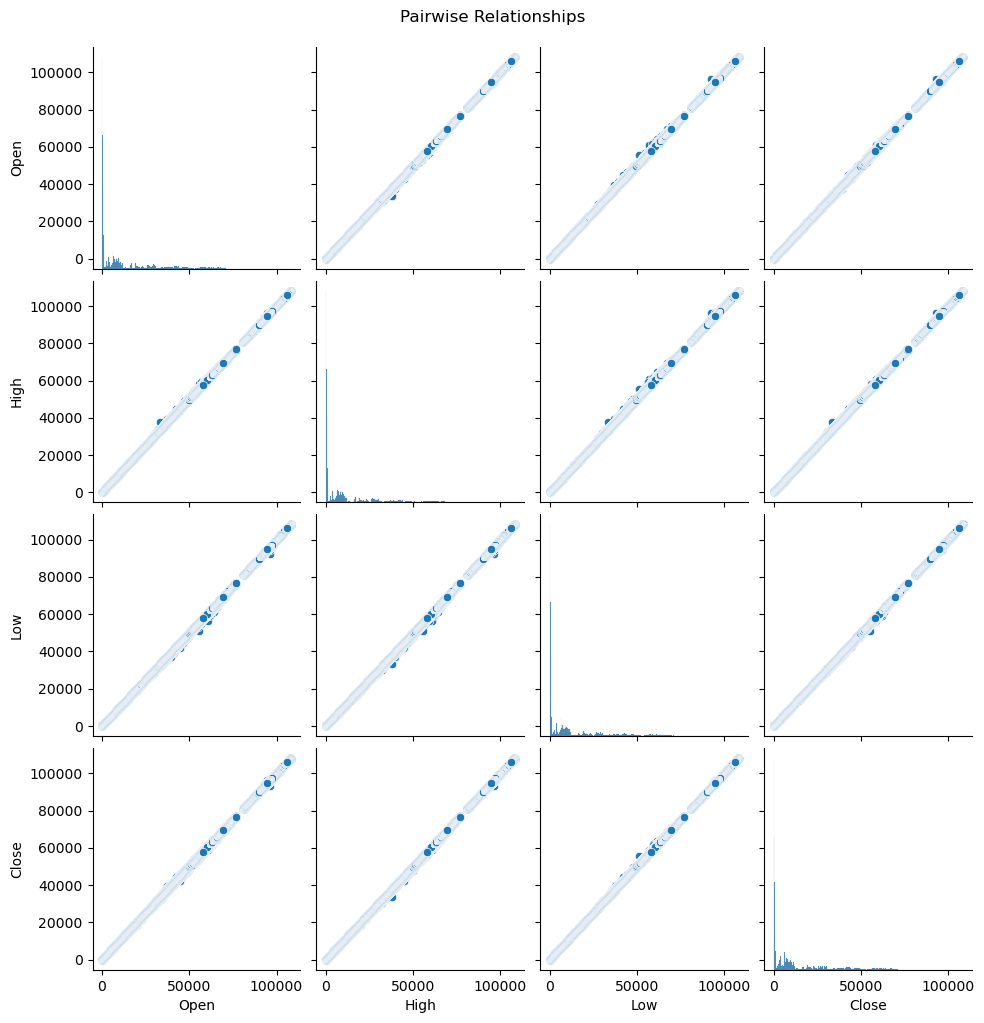

In [26]:
# Pairplot for Open, High, Low, Close
sns.pairplot(data[['Open', 'High', 'Low', 'Close']])
plt.suptitle('Pairwise Relationships', y=1.02)
plt.show()



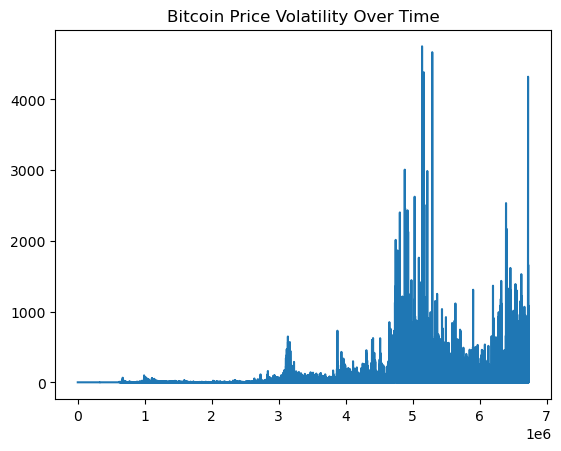

In [32]:
# Volatility (difference between high and low)
data['volatility'] = data['High'] - data['Low']

# Plot volatility over time
data['volatility'].plot(title='Bitcoin Price Volatility Over Time')
plt.show()



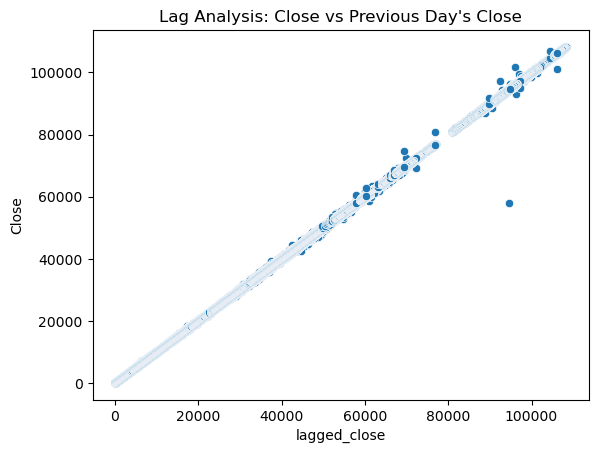

In [33]:
# Creating a lagged feature for 'close' price (previous day's close)
data['lagged_close'] = data['Close'].shift(1)

# Visualize the relationship between today's close and yesterday's close
sns.scatterplot(x=data['lagged_close'], y=data['Close'])
plt.title('Lag Analysis: Close vs Previous Day\'s Close')
plt.show()


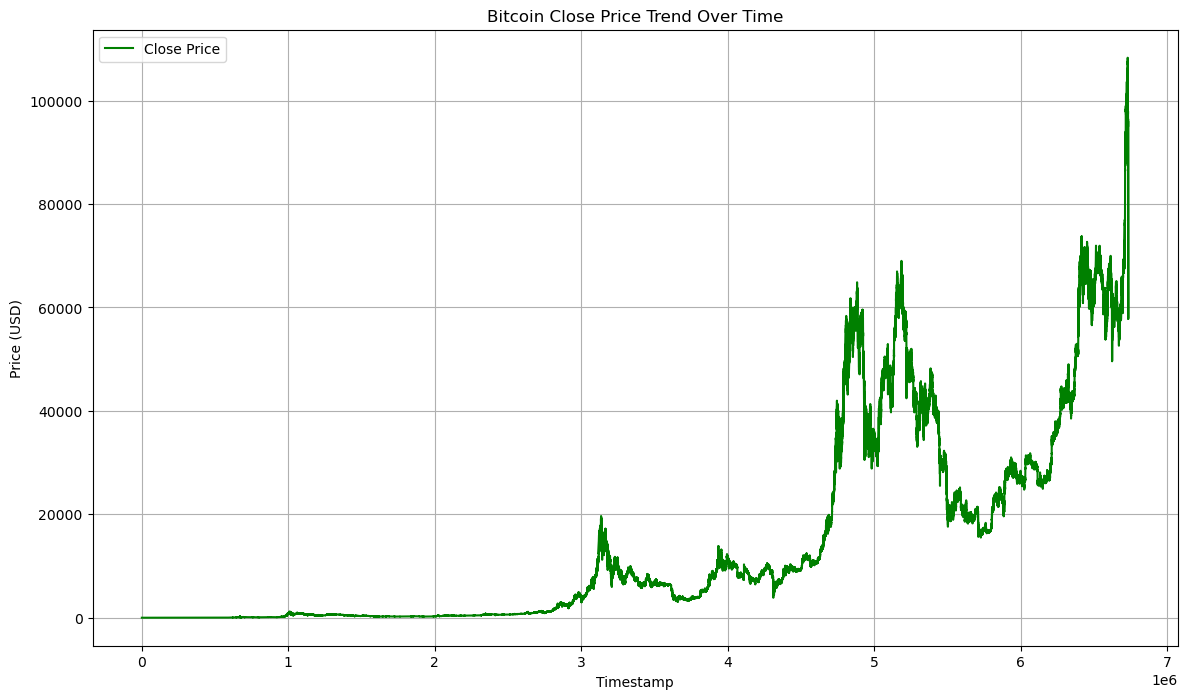

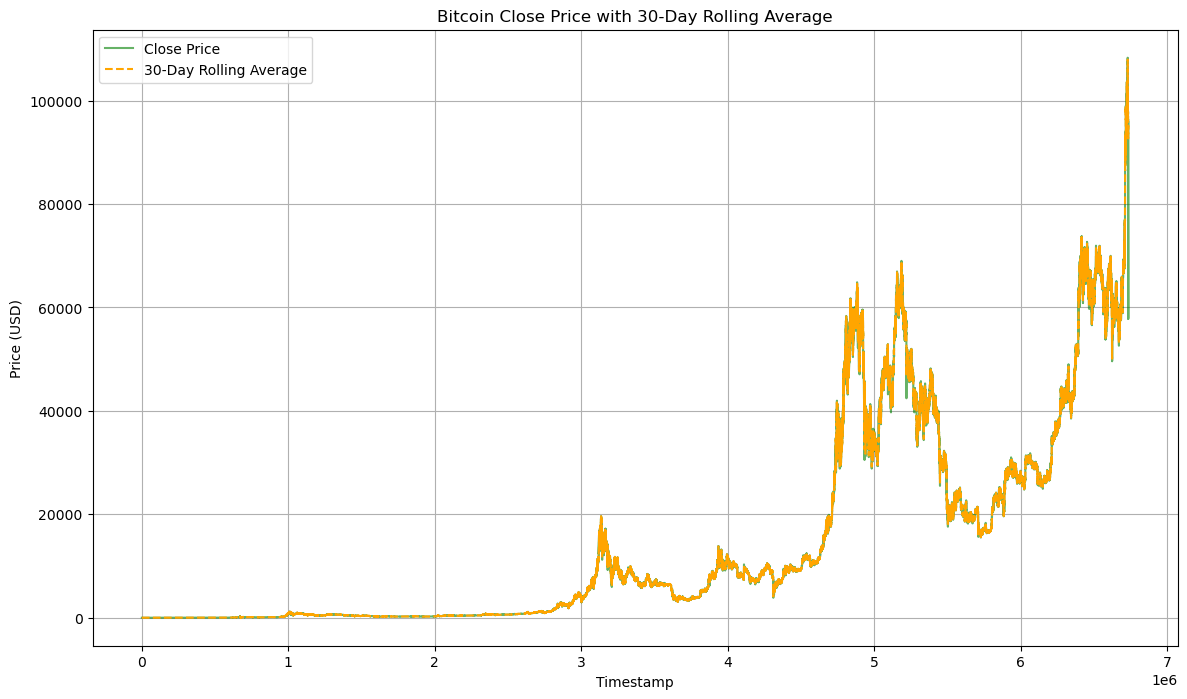

In [37]:
# Plot close prices over time
plt.figure(figsize=(14, 8))
plt.plot(data.index, data['Close'], label='Close Price', color='green')
plt.title('Bitcoin Close Price Trend Over Time')
plt.xlabel('Timestamp')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid(True)
plt.show()

# 30-day rolling average for close prices
data['rolling_close'] = data['Close'].rolling(window=30).mean()
plt.figure(figsize=(14, 8))
plt.plot(data.index, data['Close'], label='Close Price', color='green', alpha=0.6)
plt.plot(data.index, data['rolling_close'], label='30-Day Rolling Average', color='orange', linestyle='--')
plt.title('Bitcoin Close Price with 30-Day Rolling Average')
plt.xlabel('Timestamp')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid(True)
plt.show()


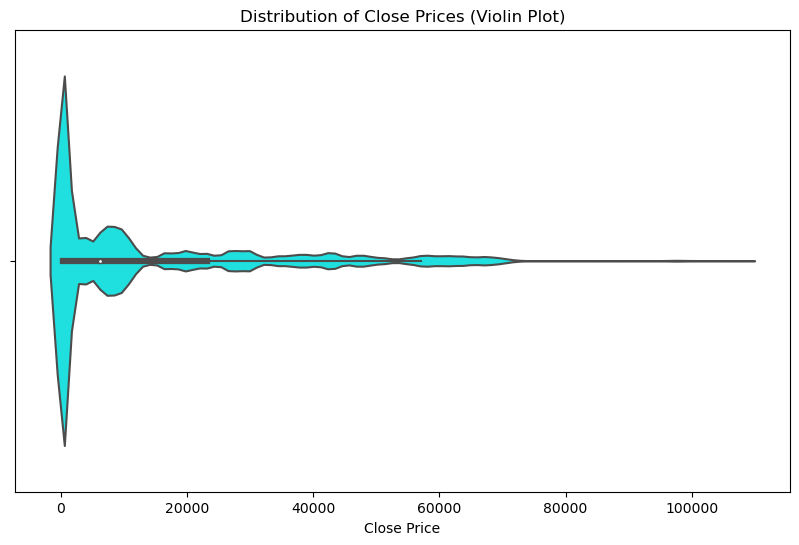

In [41]:
# Violin plot for price distribution
plt.figure(figsize=(10, 6))
sns.violinplot(x=data['Close'], color='cyan')
plt.title('Distribution of Close Prices (Violin Plot)')
plt.xlabel('Close Price')
plt.show()


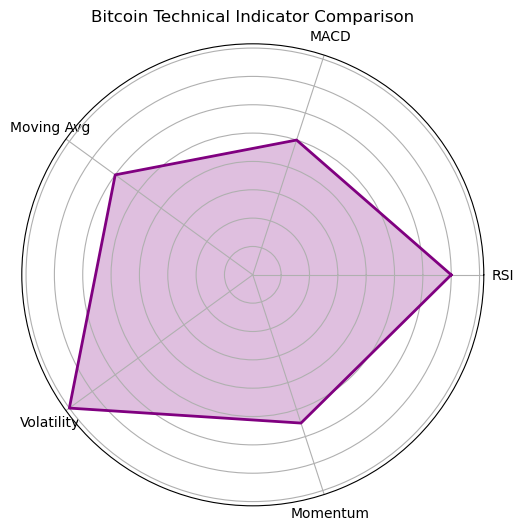

In [44]:
import numpy as np
import matplotlib.pyplot as plt

# Example data for different technical indicators
labels = ['RSI', 'MACD', 'Moving Avg', 'Volatility', 'Momentum']
values = [70, 50, 60, 80, 55]

# Create radar chart
angles = np.linspace(0, 2 * np.pi, len(labels), endpoint=False).tolist()
values += values[:1]
angles += angles[:1]

fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))
ax.fill(angles, values, color='purple', alpha=0.25)
ax.plot(angles, values, color='purple', linewidth=2)

ax.set_yticklabels([])
ax.set_xticks(angles[:-1])
ax.set_xticklabels(labels)

plt.title('Bitcoin Technical Indicator Comparison')
plt.show()


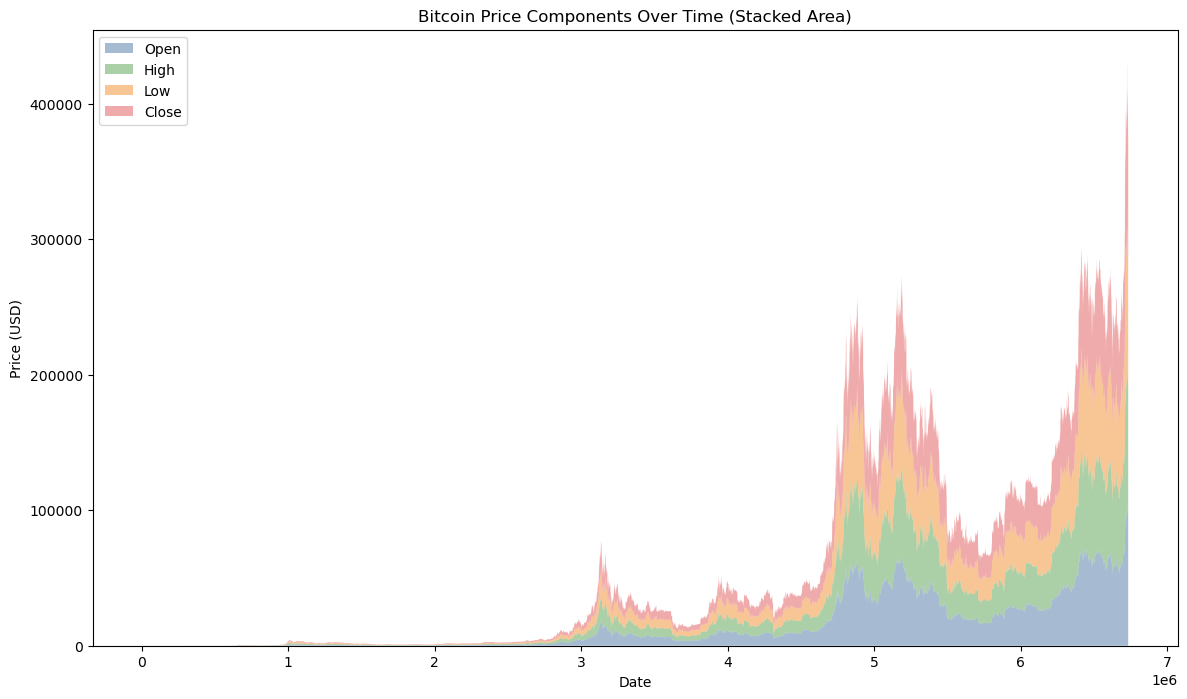

In [45]:
# Stacked area chart
plt.figure(figsize=(14, 8))
plt.stackplot(data.index, data['Open'], data['High'], data['Low'], data['Close'],
              labels=['Open', 'High', 'Low', 'Close'], alpha=0.5, colors=['#4e79a7', '#59a14f', '#f28e2b', '#e15759'])

plt.title('Bitcoin Price Components Over Time (Stacked Area)')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend(loc='upper left')
plt.show()
